In [64]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.optimize import leastsq

I created some fake ferret tracking datasets to imagine how we can develop a metric of "wonkiness." My idea was to use a Lowess curve smoother on the tracks to remove variation due to lateral distance between paws, and then compare the smoothed path to a straight line.

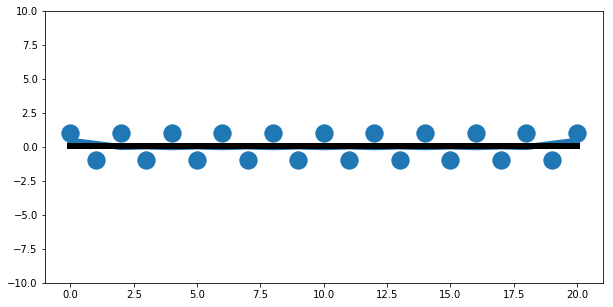

In [75]:
x = np.linspace(0, 20, 21)
y = np.empty((21,))
y[::2] = 1
y[1::2] = -1

lowess = sm.nonparametric.lowess
ymid = lowess(y, x, frac=6/20)
yavg = np.convolve(y, np.ones((21,))/21, mode='same')

plt.figure(figsize=(10, 5))
plt.scatter(x, y, s=300)
plt.plot(x, ymid[:, 1], linewidth=6)
plt.plot(x, np.mean(y)*np.ones((21,)), 'k', linewidth=6)
#plt.plot(x, yavg, 'k', linewidth=6)
plt.ylim(-10, 10)
plt.show()

In [76]:
deviation = np.sum(np.square(ymid[:, 1] - np.mean(y)))/y.shape[0]
print('The deviation from the mean is {}.'.format(np.round(deviation, decimals=2)))

The deviation from the mean is 0.02.


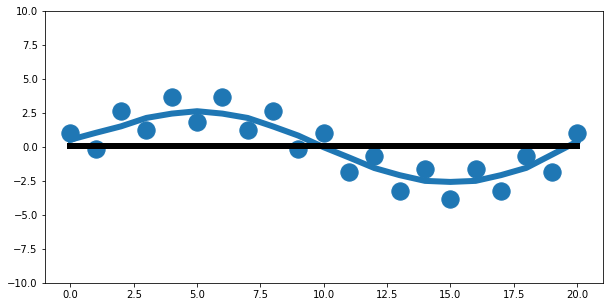

In [65]:
y_wonk = np.empty((21,))
y_wonk[::2] = 1
y_wonk[1::2] = -1
off = 2.8*np.sin(x*0.1*np.pi)
y_wonk = y_wonk + off

lowess = sm.nonparametric.lowess
ymid = lowess(y_wonk, x, frac=6/20)
yavg = np.convolve(y_wonk, np.ones((40,))/40, mode='same')

plt.figure(figsize=(10, 5))
plt.scatter(x, y_wonk, s=300)
plt.plot(x, ymid[:, 1], linewidth=6)
plt.plot(x, np.mean(y)*np.ones((21,)), 'k', linewidth=6)
#plt.plot(x, yavg, 'k', linewidth=6)
plt.ylim(-10, 10)
plt.show()

To measure deviation, measure the deviation of the lowess smoother from a straight line equivalent to the mean.

In [73]:
deviation = np.sum(np.square(ymid[:, 1] - np.mean(y)))/y.shape[0]
print('The deviation from the mean is {}.'.format(np.round(deviation, decimals=2)))

The deviation from the mean is 3.25.


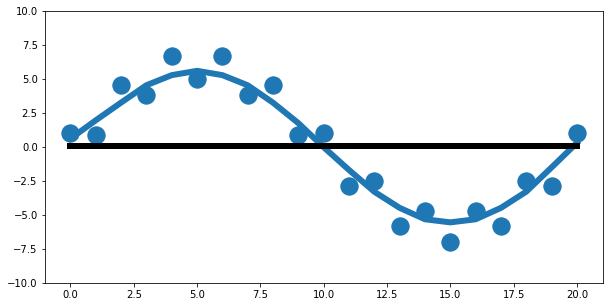

In [80]:
y_wonk = np.empty((21,))
y_wonk[::2] = 1
y_wonk[1::2] = -1
off = 6*np.sin(x*0.1*np.pi)
y_wonk = y_wonk + off

lowess = sm.nonparametric.lowess
ymid = lowess(y_wonk, x, frac=6/20)
yavg = np.convolve(y_wonk, np.ones((40,))/40, mode='same')

plt.figure(figsize=(10, 5))
plt.scatter(x, y_wonk, s=300)
plt.plot(x, ymid[:, 1], linewidth=6)
plt.plot(x, np.mean(y)*np.ones((21,)), 'k', linewidth=6)
#plt.plot(x, yavg, 'k', linewidth=6)
plt.ylim(-10, 10)
plt.show()

In [81]:
deviation = np.sum(np.square(ymid[:, 1] - np.mean(y)))/y.shape[0]
print('The deviation from the mean is {}.'.format(np.round(deviation, decimals=2)))

The deviation from the mean is 14.83.


The deviation term that used to measure "wonkiness" is just one way to report it. If we are confident that most tracks can be fit to a sine function, we could consider reporting amplitudes and frequencies to capture two different aspects that contribute to wonkiness.